# Red Neuronal Multicapa

- Programa una red neuronal multicapa como se marca en el video de la clase
- Para los siguietes cuatro conjuntos de datos:
    - Implementa una red que resuelva el problema de clasificación
    - Crea una gráfica donde cada patrón sea coloreado segun su clase
    - Crea una rejilla de puntos 2D y propaga cada punto en la red
    - Con estas predicciones crea un mapa de calor de las predicciones.
    - Para los pasos antetiores puedes basarte en el script 'MLP_test.py' anexo

- Reporta tus resultados en formato pdf

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# activation function for output layer
def linear(z, derivative=False):
    a = z.copy()
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def logistic(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
def softmax(z, derivative=False):
    e = np.exp(z - np.max(z, axis=0))
    a = e / np.sum(e, axis=0)
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a
# activation functions for hidden layers
def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def relu(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a

def logistic_hidden(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

In [132]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100), 
                         np.linspace(ymin,ymax, 100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8, 
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()
    

In [133]:
class MLP:
    def __init__(self, layers_dims, hidden_activation=tanh, output_activation=logistic):
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        # initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l - 1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation
    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a
    def train(self, X, y, epochs=500, lr=0.1):
        P = X.shape[1]
        for _ in range(epochs):
            for p in range(P):
                # initialize activations
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)
                # propagation
                a[0] = X[:,p].reshape(-1,1)
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)
                # backpropagation
                for l in range(self.L, 0, -1):
                    if l == self.L:
                        lg[l] = (y[:,p].reshape(-1,1) - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l+1].T, lg[l + 1]) * da[l]
                # gradient descent
                for l in range(1, self.L + 1):
                    self.w[l] += lr * np.dot(lg[l], a[l - 1].T)
                    self.b[l] += lr * lg[l]

## Test

In [206]:
X = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
Y = np.array([[0, 1,1,0]]) 

In [207]:
X.shape

(2, 4)

(2, 1000)

In [208]:
Y.shape

(1, 4)

(1000,)

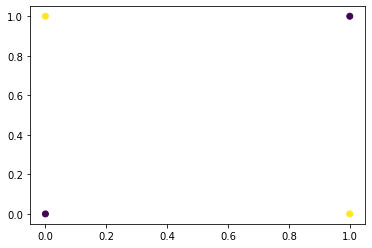

In [209]:
plt.scatter(X[:][0],X[:][1],c=Y[:][0])
plt.show()

[[0.03290586 0.02917578 0.00032519 0.00048539]]


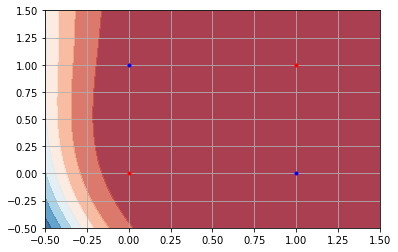

In [210]:
net = MLP((2,100,1),hidden_activation = relu, output_activation = logistic)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

[[0.00319442 0.99627344 0.99634481 0.00391553]]


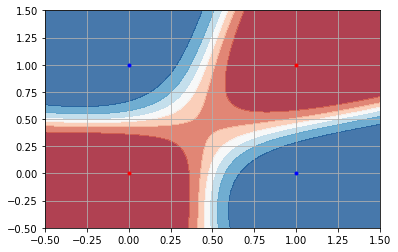

In [211]:
net.train(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

## Blobs dataset

In [178]:
data = np.genfromtxt('blobs.csv', delimiter=',', skip_header=True)

In [179]:
X1 = data[:,0]
X2 = data[:,1]
X = np.array([X1,X2])
Y = data[:,2]
Y = np.expand_dims(Y, axis=0)


In [180]:
X.shape

(2, 1000)

In [181]:
Y.shape

(1, 1000)

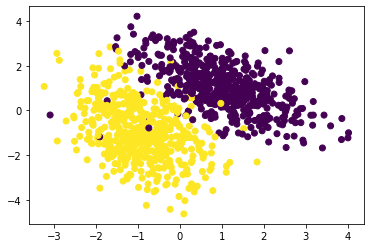

In [182]:
plt.scatter(X[:][0],X[:][1],c=Y[:][0])
plt.show()

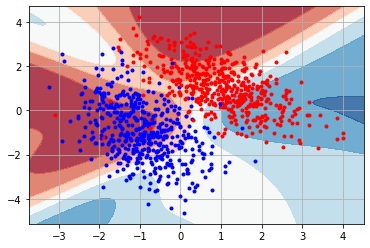

In [183]:
net = MLP((2,100,1),hidden_activation = relu, output_activation = logistic)
# print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

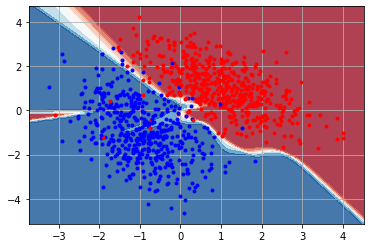

In [184]:
net.train(X, Y)
# print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

## Circles Dataset

In [214]:
data = np.genfromtxt('circles.csv', delimiter=',', skip_header=True)

In [215]:
X1 = data[:,0]
X2 = data[:,1]
X = np.array([X1,X2])
Y = data[:,2]
Y = np.expand_dims(Y, axis=0)

In [216]:
X.shape

(2, 1000)

In [217]:
Y.shape

(1, 1000)

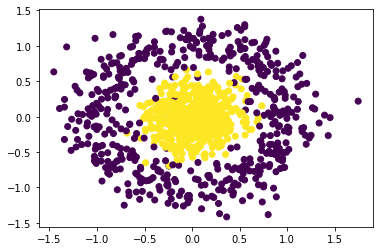

In [218]:
plt.scatter(X[:][0],X[:][1],c=Y[:][0])
plt.show()

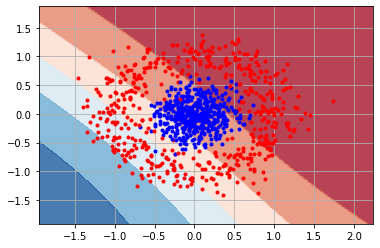

In [219]:
net = MLP((2,100,1),hidden_activation = logistic_hidden, output_activation = logistic)
# print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

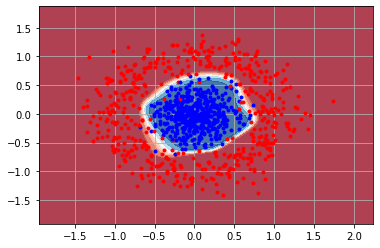

In [220]:
net.train(X, Y)
# print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

## Moons dataset

In [221]:
data = np.genfromtxt('moons.csv', delimiter=',', skip_header=True)

In [222]:
X1 = data[:,0]
X2 = data[:,1]
X = np.array([X1,X2])
Y = data[:,2]
Y = np.expand_dims(Y, axis=0)

In [223]:
X.shape

(2, 1000)

In [224]:
Y.shape

(1, 1000)

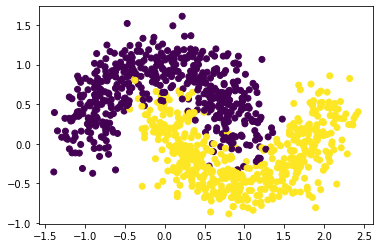

In [225]:
plt.scatter(X[:][0],X[:][1],c=Y[:][0])
plt.show()

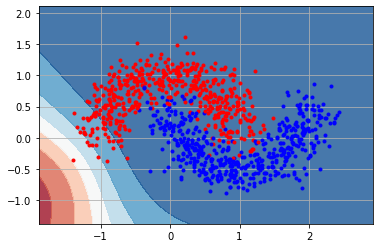

In [228]:
net = MLP((2,100,1),hidden_activation = tanh, output_activation = logistic)
# print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

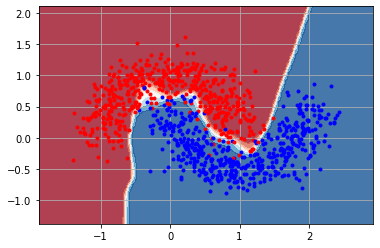

In [229]:
net.train(X, Y)
# print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)